In [2]:
library(data.table)
library(ggplot2)
library(plotrix)


In [48]:
HBp <- fread(file = './HBp1.csv', header=FALSE, sep=",", nrows=2)
HBp1 <- fread(file = './HBp1.csv', header=FALSE, skip=2, sep=",", nrows=2)

HBp <- cbind(as.numeric(HBp[1,]), as.numeric(HBp[2,]) / sum(HBp[2,]))
HBp1 <- cbind(as.numeric(HBp1[1,]), as.numeric(HBp1[2,]) / sum(HBp1[2,]))

HBp
HBp1

2,0.297092073
3,0.321025353
4,0.235894744
5,0.112368855
6,0.030957257
7,0.002661718


2,0.001710423
3,0.002226498
4,0.896099205
5,0.097471966
6,0.002491909


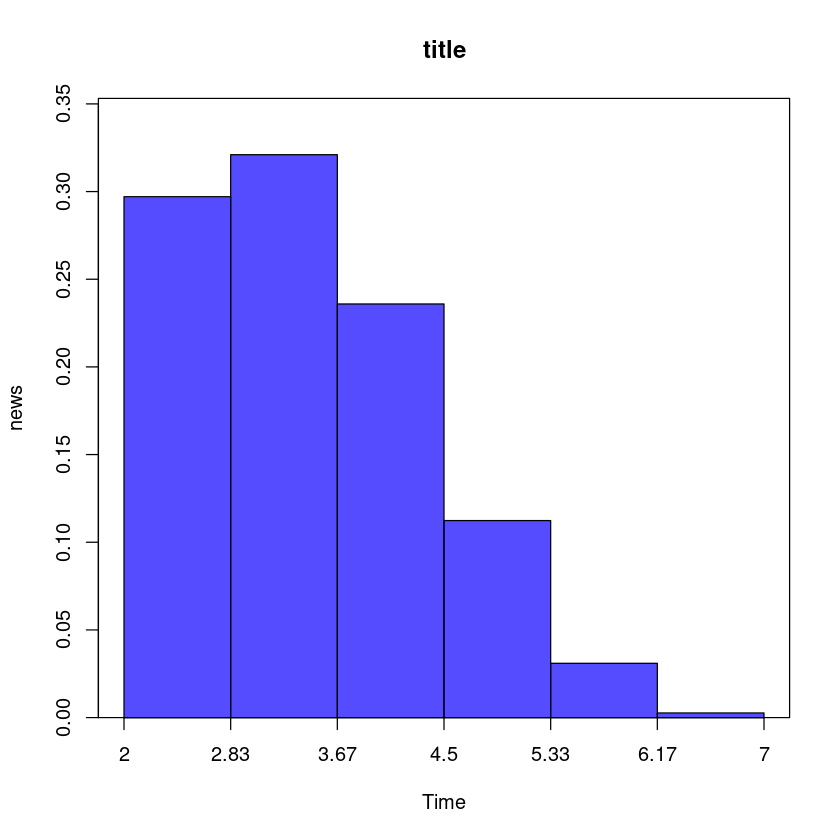

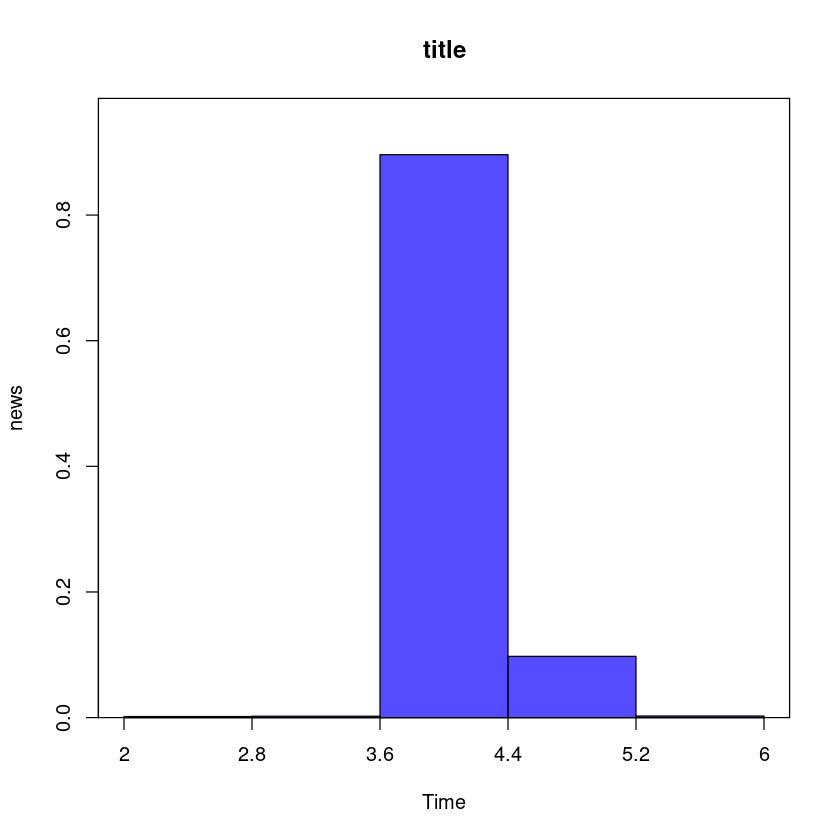

In [71]:
x1 <- HBp[,1]
y1 <- HBp[,2]
x2 <- HBp1[,1]
y2 <- HBp1[,2]

#y1 <- log(y1)
#y2 <- log(y2)

weighted.hist(
    x1, y1, 
    col=rgb(0.05,0,1,0.7),
    main="title", 
    xlab="Time", ylab="news", breaks=length(y1),
)

box()

weighted.hist(
    x2, y2,
    col=rgb(0.05,0,1,0.7),
    main="title", 
    xlab="Time", ylab="news", breaks=length(y2))
box()


Call:
lm(formula = X ~ Y)

Coefficients:
(Intercept)            Y  
     2.1927      -0.8999  


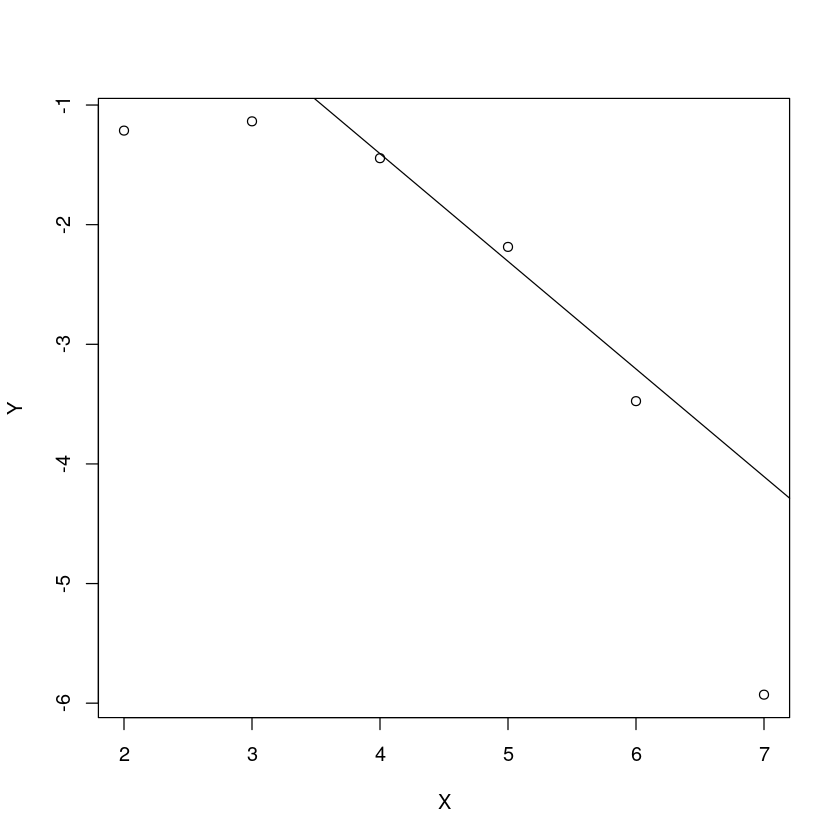

In [69]:
X <- HBp[,1]
Y <- log(HBp[,2])

plot(X,Y) 
abline(lm(X ~ Y))
lm(X ~ Y)